## Cleaning of the data

In [1]:
import IPython
from pathlib import Path
import pandas as pd

notebook_name = "/".join(
        IPython.extract_module_locals()[1]["__vsc_ipynb_file__"].split("/")[-5:]
    )
print(notebook_name)
root_folder = Path(notebook_name).parent.parent
print(root_folder)

# parent folder of current notebook
cases_file = Path(root_folder, "data", "cases-2023-12-12PST17-16-15.csv")
assertes_with_codes_file = Path(root_folder, "data", "asserters-with-codes-2023-12-12PST17-16-37.csv")

cases = pd.read_csv(cases_file)
# read and ignore ParserError: Error tokenizing data. C error: Expected 13 fields in line 99477, saw 15
asserters = pd.read_csv(assertes_with_codes_file, on_bad_lines='skip')

c:\to_save\aalto\courses\networks_hands_on\project\notebooks\cleaning.ipynb
c:\to_save\aalto\courses\networks_hands_on\project


In [2]:
# patents column in asserters is a string with semicolon separated values and can be Nan, '4523178' or '4523178; 4523179'. Convert it to list of integers for each row
asserters['Alleged Infringer'] = asserters['Alleged Infringer'].apply(lambda x: [value.strip() for value in x.split(';') if value] if isinstance(x, str) else [])
asserters.head(15)
# print count values for alleged infringer
# combine all lists of alleged infringers into one list
from collections import Counter
alleged_infringers = [infringer for infringers in asserters['Alleged Infringer'] for infringer in infringers]
alleged_infringers_count = Counter(alleged_infringers)
# print top 50 alleged infringers
print(alleged_infringers_count.most_common(50))
print(f"Len of unique alleged infringers before filtering: {len(alleged_infringers_count)} ",)
alleged_infringers_count.most_common(15)

[('Does', 1653), ('Teva Pharmaceuticals USA, Inc.', 1106), ('Mylan Pharmaceuticals, Inc.', 1100), ('Apotex Inc.', 893), ('Apple Inc.', 810), ('Mylan, Inc.', 708), ('Samsung Electronics America, Inc.', 701), ('LG Electronics, Inc.', 663), ('Sandoz Inc.', 663), ('Samsung Electronics Co., Ltd.', 634), ('Lupin Ltd.', 612), ('Amazon.com, Inc.', 605), ('Teva Pharmaceutical Industries Ltd.', 592), ('Microsoft Corporation', 576), ('Lupin Pharmaceuticals, Inc.', 572), ("Dr. Reddy's Laboratories, Ltd.", 529), ("Dr. Reddy's Laboratories, Inc.", 496), ('HTC Corporation', 478), ('Watson Laboratories, Inc.', 469), ('Actavis Inc.', 425), ('Sun Pharmaceutical Industries Ltd.', 419), ('Dell Inc.', 409), ('Zydus Pharmaceuticals (USA) Inc.', 403), ('Par Pharmaceutical Inc.', 400), ('Aurobindo Pharma Ltd.', 390), ('Watson Pharmaceuticals, Inc', 382), ('Hewlett-Packard Company', 380), ('Sony Corporation', 378), ('AT&T Corp.', 358), ('Google Inc.', 356), ('Amneal Pharmaceuticals LLC', 348), ('Cadila Healthc

[('Does', 1653),
 ('Teva Pharmaceuticals USA, Inc.', 1106),
 ('Mylan Pharmaceuticals, Inc.', 1100),
 ('Apotex Inc.', 893),
 ('Apple Inc.', 810),
 ('Mylan, Inc.', 708),
 ('Samsung Electronics America, Inc.', 701),
 ('LG Electronics, Inc.', 663),
 ('Sandoz Inc.', 663),
 ('Samsung Electronics Co., Ltd.', 634),
 ('Lupin Ltd.', 612),
 ('Amazon.com, Inc.', 605),
 ('Teva Pharmaceutical Industries Ltd.', 592),
 ('Microsoft Corporation', 576),
 ('Lupin Pharmaceuticals, Inc.', 572)]

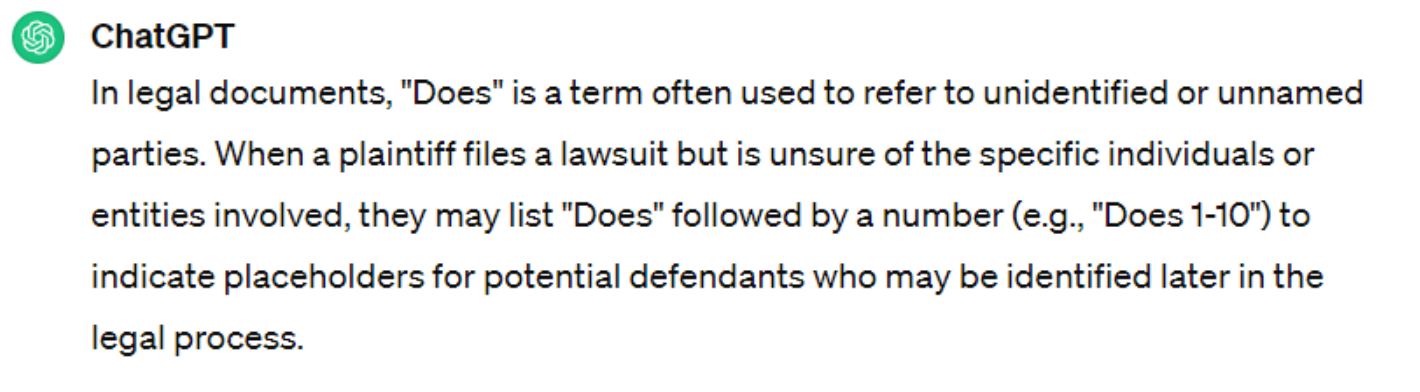

In [3]:
# print all alleged infringers with 'does' in their name
for alleged_infringer in alleged_infringers_count:
    if 'does' in alleged_infringer.lower():
        print(alleged_infringer)

Does 1 - 10
John Does 1-10
John Does I-III
Does 1-10
Does 1 through 100
DOES 1-20
Does I through L, inclusive
Does
John Does
Does 1 through 10, inclusive
Does 1 through 25, inclusive
Does 1-10, inclusive
Does 1 to 10
Does 1 to 10 inclusive
Does I through L inclusive
Does 1-9, inclusive
Does 1 through 20
Does I-X inclusive
DOES 1 through 20, inclusive
Does 1 Through 50
DOES I through X, inclusive
Jane Does
1 through 10  John Does
John Does, 1-5
JANE DOES (1-10)
John Does 1-100
Does 1 through 10
John Does 1-4
JOHN DOES 1 THROUGH 10
DOES 1-100
JOHN DOES I-VII
John Does Nos. 1-10
JOHN DOES  1-10
John/Jane Does
1-50  John Does
John Does No. 1-25
Does 1 - 15
Various Jane Does
Does 4-11
DOES 1 through 100, inclusive
Does 1-10 inclusive
Does 5 through 10
John Does I-X
John Does I-V
John Does 1-20
JANE DOES I TO X
VARIOUS JOHN AND JANE DOES
John Does 1-3
JOHN DOES NOS. 1 THROUGH 10
John Does 1 thru 10
John Does 1-30
John Does 1-8
John Does, I-III
John or Jane Does 1-10
John 1-100 Does
Jane Does

In [4]:
rm_list = []
# remove all alleged infringers with 'does' in their name
for alleged_infringer in alleged_infringers_count:
    if 'does' in alleged_infringer.lower():
        rm_list.append(alleged_infringer)

# print all alleged infringers counts without rm_list
for rm in rm_list:
    del alleged_infringers_count[rm]

print(f"Len of unique alleged infringers after filtering: {len(alleged_infringers_count)} ",)
alleged_infringers_count.most_common(25)

Len of unique alleged infringers after filtering: 74565 


[('Teva Pharmaceuticals USA, Inc.', 1106),
 ('Mylan Pharmaceuticals, Inc.', 1100),
 ('Apotex Inc.', 893),
 ('Apple Inc.', 810),
 ('Mylan, Inc.', 708),
 ('Samsung Electronics America, Inc.', 701),
 ('LG Electronics, Inc.', 663),
 ('Sandoz Inc.', 663),
 ('Samsung Electronics Co., Ltd.', 634),
 ('Lupin Ltd.', 612),
 ('Amazon.com, Inc.', 605),
 ('Teva Pharmaceutical Industries Ltd.', 592),
 ('Microsoft Corporation', 576),
 ('Lupin Pharmaceuticals, Inc.', 572),
 ("Dr. Reddy's Laboratories, Ltd.", 529),
 ("Dr. Reddy's Laboratories, Inc.", 496),
 ('HTC Corporation', 478),
 ('Watson Laboratories, Inc.', 469),
 ('Actavis Inc.', 425),
 ('Sun Pharmaceutical Industries Ltd.', 419),
 ('Dell Inc.', 409),
 ('Zydus Pharmaceuticals (USA) Inc.', 403),
 ('Par Pharmaceutical Inc.', 400),
 ('Aurobindo Pharma Ltd.', 390),
 ('Watson Pharmaceuticals, Inc', 382)]

### Remove duplicates from the datasets

In [73]:
from fuzzywuzzy import fuzz

print(fuzz.ratio("Dr. Reddy's Laboratories, Ltd.", "Dr. Reddy's Laboratories, Inc."))
print(fuzz.ratio('Samsung Electronics America, Inc.', 'Samsung Electronics Co., Ltd.'))

ignore_words_ = ["Corporation", "Inc.", "Ltd.", "LLC", "Co.", "Co", "Electronics", "Technologies", "Industries", "Group", "Holdings", "Companies", "Company",
                 "Device", "Digital", "International", "Global", "Telecommunications", "Semiconductor", "Semiconductors",
                 "Systems", "Solutions", "International", "America", "USA", "US", "United States", "Company", "Motor", "Sales", "Manufacturing", "Manufacture", "Manufactures",
                 "North America", "South America", "Europe", "Asia", "Africa", "Australia", "Pacific", "U.S.A.", "Mobility", "LLC",
                 "Communications", "Laboratories", "Pharmaceutical", "Pharmaceuticals", "Pharma", "Biotech", "Biotechnologies", "corp.", "partnership",
                 "Limited", "Healthcare", "Health", "Medical", "Medicine", "Medicines", "Therapeutics", "Therapy", "Therapies", "Computer", "Software", "Inc", "Ltd", "united", "states", "private"]

def clean_term(term_, ignore_words = ignore_words_):
    term = term_.split()
    # remove commas
    term = [word.replace(",", "") for word in term]
    # remove ' and "
    term = [word.replace("'", "") for word in term]
    term = [word.replace('"', "") for word in term]
    term = [word.replace('(', "") for word in term]
    term = [word.replace(')', "") for word in term]
    # strip each word
    term = [word.strip() for word in term]
    # use lower case for all words and for ignore_words
    term = [word.lower() for word in term]
    ignore_words1 = [word.lower() for word in ignore_words]
    for word in ignore_words1:
        if word in term:
            term.remove(word)
    return " ".join(term)

def fuzz_ratio_ignore_words(str1, str2, ignore_words = ignore_words_) -> int:
    str1 = clean_term(str1, ignore_words)
    str2 = clean_term(str2, ignore_words)
    # construct consensus from str1 and str2
    return fuzz.partial_ratio(str1, str2) if min(len(str1), len(str2)) > 4 else fuzz.ratio(str1, str2)

print(clean_term("Samsung Electronics Co., Ltd."))
fuzz_ratio_ignore_words('Huawei Technologies USA, Inc.', 'Hauwei Technologies USA, Inc.')

90
74
samsung


83

In [74]:
fuzz_ratio_ignore_words('samsung', 'sun')

60

In [75]:
print(clean_term('Toyota Motor Sales, U.S.A., Inc.'))
print(clean_term('Motorola, Inc.'))
print(fuzz.partial_ratio('toyota', 'motorola'))
fuzz_ratio_ignore_words('Toyota Motor Sales, U.S.A., Inc.', 'Motorola, Inc.')

toyota
motorola
67


67

In [76]:
from tqdm import tqdm

def extend_dict(dict1, str1, str2):
    if str1 in dict1:
        if str2 not in dict1[str1]:
            dict1[str1].append(str2)
    else:
        dict1[str1] = [str2]
    if str2 in dict1:
        if str1 not in dict1[str2]:
            dict1[str2].append(str1)
    else:
        dict1[str2] = [str1]

def find_similar_names(infringers, threshold=70):
    duplicates_dict = {}
    for infringer in tqdm(infringers):
        for infringer2 in infringers:
            if infringer != infringer2:
                f_ratio = fuzz_ratio_ignore_words(infringer, infringer2)
                if f_ratio > threshold:
                    extend_dict(duplicates_dict, infringer, infringer2)

    return duplicates_dict

#### We will make a map with duplicates for most frequent terms (> threshold cases)

In [77]:
# print number of infringers with count > 1000
threshold = 100
infringers_count = {k: v for k, v in alleged_infringers_count.items() if v > threshold}
print(f"Number of infringers with count > {threshold}: {len(infringers_count)}")
# find duplicates for infringers with count > 1000
duplicates_dict = find_similar_names(infringers_count.keys(), 80)
print(f"Number of infringers with count > {threshold} and duplicates: {len(duplicates_dict)}")
duplicates_dict

Number of infringers with count > 100: 141


100%|██████████| 141/141 [00:01<00:00, 87.55it/s]

Number of infringers with count > 100 and duplicates: 61


{'Motorola, Inc.': ['Motorola Mobility LLC'],
 'Motorola Mobility LLC': ['Motorola, Inc.'],
 'Toshiba Corporation': ['Toshiba America Information Systems, Inc.'],
 'Toshiba America Information Systems, Inc.': ['Toshiba Corporation'],
 'Samsung Electronics Co., Ltd.': ['Samsung Electronics America, Inc.',
  'Samsung Telecommunications America LLC'],
 'Samsung Electronics America, Inc.': ['Samsung Electronics Co., Ltd.',
  'Samsung Telecommunications America LLC'],
 'Samsung Telecommunications America LLC': ['Samsung Electronics Co., Ltd.',
  'Samsung Electronics America, Inc.'],
 'Huawei Technologies Co., Ltd.': ['Huawei Device USA, Inc.',
  'Huawei Technologies USA, Inc.'],
 'Huawei Device USA, Inc.': ['Huawei Technologies Co., Ltd.',
  'Huawei Technologies USA, Inc.'],
 'Huawei Technologies USA, Inc.': ['Huawei Technologies Co., Ltd.',
  'Huawei Device USA, Inc.'],
 'Google Inc.': ['Google LLC'],
 'Google LLC': ['Google Inc.'],
 'Sony Corporation': ['Sony Electronics, Inc.'],
 'Sony E

In [78]:
# make merge of this dict
def merge_connected_words(word_dict):
    merged_dict = {}
    keyword_dict = {}

    # Iterate through each key-value pair in the input dictionary
    for word, neighbors in word_dict.items():
        # Check if the word is already in the merged dictionary
        if word in merged_dict:
            keyword = merged_dict[word]
        else:
            keyword = word

        # Update merged dictionary with the keyword
        for neighbor in neighbors:
            merged_dict[neighbor] = keyword

        # Update keyword dictionary with connected words
        if keyword in keyword_dict:
            keyword_dict[keyword].extend(neighbors)
        else:
            keyword_dict[keyword] = neighbors

    return merged_dict, keyword_dict

merged_map, keyword_map = merge_connected_words(duplicates_dict)

# replace values in merged map with clean term
merged_map_clean = {}
for k, vv in merged_map.items():
    merged_map_clean[k] = clean_term(vv)

# replace keys in keyword map with clean term
keyword_map_clean = {}
for k, vv in keyword_map.items():
    #print(k)
    #print(clean_term(k))
    keyword_map_clean[clean_term(k)] = vv

merged_map_clean

{'Motorola Mobility LLC': 'motorola',
 'Motorola, Inc.': 'motorola',
 'Toshiba America Information Systems, Inc.': 'toshiba',
 'Toshiba Corporation': 'toshiba',
 'Samsung Electronics America, Inc.': 'samsung',
 'Samsung Telecommunications America LLC': 'samsung',
 'Samsung Electronics Co., Ltd.': 'samsung',
 'Huawei Device USA, Inc.': 'huawei',
 'Huawei Technologies USA, Inc.': 'huawei',
 'Huawei Technologies Co., Ltd.': 'huawei',
 'Google LLC': 'google',
 'Google Inc.': 'google',
 'Sony Electronics, Inc.': 'sony',
 'Sony Corporation': 'sony',
 'AT&T Mobility LLC': 'at&t',
 'AT&T Corp.': 'at&t',
 'Research In Motion Limited': 'research in motion',
 'Research In Motion Corporation': 'research in motion',
 'Comcast Cable Communications, LLC': 'comcast',
 'Comcast Corporation': 'comcast',
 'Lenovo Group Limited': 'lenovo',
 'Lenovo (United States) Inc.': 'lenovo',
 'Teva Pharmaceutical Industries Ltd.': 'teva',
 'Teva Pharmaceuticals USA, Inc.': 'teva',
 'Watson Laboratories, Inc.': 'wats

In [79]:
print(len(keyword_map_clean))
print(keyword_map_clean.keys())
keyword_map_clean

26
dict_keys(['motorola', 'toshiba', 'samsung', 'huawei', 'google', 'sony', 'at&t', 'research in motion', 'comcast', 'lenovo', 'teva', 'watson', 'lupin', 'par', 'ranbaxy', 'dr. reddys', 'actavis', 'mylan', 'torrent', 'sun', 'aurobindo', 'wockhardt', 'amneal', 'hetero', 'alembic', 'msn'])


{'motorola': ['Motorola Mobility LLC', 'Motorola, Inc.'],
 'toshiba': ['Toshiba America Information Systems, Inc.',
  'Toshiba Corporation'],
 'samsung': ['Samsung Electronics America, Inc.',
  'Samsung Telecommunications America LLC',
  'Samsung Electronics Co., Ltd.',
  'Samsung Telecommunications America LLC',
  'Samsung Electronics Co., Ltd.',
  'Samsung Electronics America, Inc.'],
 'huawei': ['Huawei Device USA, Inc.',
  'Huawei Technologies USA, Inc.',
  'Huawei Technologies Co., Ltd.',
  'Huawei Technologies USA, Inc.',
  'Huawei Technologies Co., Ltd.',
  'Huawei Device USA, Inc.'],
 'google': ['Google LLC', 'Google Inc.'],
 'sony': ['Sony Electronics, Inc.', 'Sony Corporation'],
 'at&t': ['AT&T Mobility LLC', 'AT&T Corp.'],
 'research in motion': ['Research In Motion Limited',
  'Research In Motion Corporation'],
 'comcast': ['Comcast Cable Communications, LLC', 'Comcast Corporation'],
 'lenovo': ['Lenovo Group Limited', 'Lenovo (United States) Inc.'],
 'teva': ['Teva Pharmac

#### Now we want to go throw all the infringers and use our map to find the duplicates

In [80]:
def find_key(infringer, keyword_map, threshold):
    for k, vv in keyword_map.items():
        if fuzz_ratio_ignore_words(infringer, k) >= threshold:
            return k
    return None

alleged_infringers_key_to_list_map = {}
alleged_infringers_to_key_map = {}
threshold = 82

for k, v in tqdm(alleged_infringers_count.items()):
    # check fuzzy match with keys in keyword_map_clean
    key = find_key(k, keyword_map_clean, threshold)
    if key:
        if key in alleged_infringers_key_to_list_map:
            alleged_infringers_key_to_list_map[key].append(k)
        else:
            alleged_infringers_key_to_list_map[key] = [k]
        alleged_infringers_to_key_map[k] = key

100%|██████████| 74565/74565 [02:59<00:00, 414.60it/s]


In [81]:
print(f"Number of unique keys: {len(alleged_infringers_key_to_list_map)}")
alleged_infringers_key_to_list_map

Number of unique keys: 26


{'motorola': ['Motorola, Inc.',
  'Motorola Iden',
  'Motorola Mobility, Inc.',
  'Motorola Solutions, Inc.',
  'Motorola',
  'Motorola, Inc.   Motorola, Inc.',
  'Motorla Mobility LLC',
  'Motorola Mobility LLC',
  'Motorola Mobility Holdings, Inc.',
  'Motorolla Mobility LLC',
  'Motorola,',
  'Motorola Mobility Holdings, LLC',
  'Motorola Mobility Holdings LLC'],
 'toshiba': ['Toshiba Corporation',
  'Toshiba America Consumer Products Inc',
  'Toshiba America Electronic Components, Inc.',
  'Toshiba America Information Systems, Inc.',
  'Toshiba America Consumer Products, LLC',
  'Toshiba American Information Services, Inc.',
  'Tochiba America Consumer Products, Inc.',
  'Toshiba America Consumer Products, Inc., et al',
  'Toshiba America Medical Systems, Inc.',
  'Toshiba America Business Solutions, Inc.',
  'Toshiba America Electrontic Components, Inc.',
  'Toshiba American Consumer Products, Inc.',
  'Toshiba TEC America Retail Information Systems, Inc.',
  'Toshiba American Con

In [82]:
# delete 'watson', 'hetero' and  'research in motion' because of too many false positives.
# first get all values for these keys
def delete_key(key, key_to_list_map, key_map):
    values = key_to_list_map[key]
    for value in values:
        del key_map[value]
    del key_to_list_map[key]

for key in ['watson', 'hetero', 'research in motion']:
    delete_key(key, alleged_infringers_key_to_list_map, alleged_infringers_to_key_map)

# add original one: 'research in motion': ['Research In Motion Corporation', 'Research In Motion Limited']
alleged_infringers_key_to_list_map['research in motion'] = ['Research In Motion Corporation', 'Research In Motion Limited']
alleged_infringers_to_key_map['Research In Motion Corporation'] = 'research in motion'
alleged_infringers_to_key_map['Research In Motion Limited'] = 'research in motion'

print(f"Number of unique keys: {len(alleged_infringers_key_to_list_map)}")
alleged_infringers_key_to_list_map

Number of unique keys: 24


{'motorola': ['Motorola, Inc.',
  'Motorola Iden',
  'Motorola Mobility, Inc.',
  'Motorola Solutions, Inc.',
  'Motorola',
  'Motorola, Inc.   Motorola, Inc.',
  'Motorla Mobility LLC',
  'Motorola Mobility LLC',
  'Motorola Mobility Holdings, Inc.',
  'Motorolla Mobility LLC',
  'Motorola,',
  'Motorola Mobility Holdings, LLC',
  'Motorola Mobility Holdings LLC'],
 'toshiba': ['Toshiba Corporation',
  'Toshiba America Consumer Products Inc',
  'Toshiba America Electronic Components, Inc.',
  'Toshiba America Information Systems, Inc.',
  'Toshiba America Consumer Products, LLC',
  'Toshiba American Information Services, Inc.',
  'Tochiba America Consumer Products, Inc.',
  'Toshiba America Consumer Products, Inc., et al',
  'Toshiba America Medical Systems, Inc.',
  'Toshiba America Business Solutions, Inc.',
  'Toshiba America Electrontic Components, Inc.',
  'Toshiba American Consumer Products, Inc.',
  'Toshiba TEC America Retail Information Systems, Inc.',
  'Toshiba American Con

In [ ]:
# make an alias column to asserters using alleged_infringers_to_key_map
asserters['infringet_aliases'] = asserters['Alleged Infringer'].apply(lambda x: [alleged_infringers_to_key_map[value] for value in x if value in alleged_infringers_to_key_map])

In [26]:
# check asserters df and find some rows where Patent Asserter has "huawei" in its name to ids of asserters
test_df = asserters[asserters['Patent Asserter'].str.contains('samsung', case=False)]
test_df

,case_node_id,Case Title,Civil Action #,Venue,Filing Date,included in random sample,DJ,patents,Alleged Infringer,paragraph_id,Patent Asserter,asserter_id,Asserter Category
106,118608,Samsung Electronics v. Sandisk Corporation,9:02-cv-00058,E.D.Tex.,2002-03-05,0,0,5473563; 5514889; 5546341; 5642309,[Sandisk Corporation],4124,"Samsung Electronics Co., Ltd.",100962,8.0
457,118904,"Samsung Electronics Co., LTD., v. Matsushita E...",6:06-cv-00154,E.D.Tex.,2005-09-15,0,0,5091339; 5173442; 5189588; 6677195; RE35680; R...,"[Panasonic Corporation (of North America), Mat...",4475,"Samsung Electronics Co., Ltd.",100962,8.0
2418,120288,Samsung Electronics Co. Ltd. v. ON Semiconduct...,1:06-cv-00720,D.Del.,2006-11-30,0,0,5000827; 5252177; 5361001; 5563594; 6362644,"[ON Semiconductor Corporation, Semiconductor C...",6445,"Samsung Electronics Co., Ltd.",100962,8.0
2419,120288,Samsung Electronics Co. Ltd. v. ON Semiconduct...,1:06-cv-00720,D.Del.,2006-11-30,0,0,5000827; 5252177; 5361001; 5563594; 6362644,"[ON Semiconductor Corporation, Semiconductor C...",6446,"Samsung Telecommunications America General, L....",100985,8.0
2420,120288,Samsung Electronics Co. Ltd. v. ON Semiconduct...,1:06-cv-00720,D.Del.,2006-11-30,0,0,5000827; 5252177; 5361001; 5563594; 6362644,"[ON Semiconductor Corporation, Semiconductor C...",6447,"Samsung Electronics America, Inc.",100957,8.0
2421,120288,Samsung Electronics Co. Ltd. v. ON Semiconduct...,1:06-cv-00720,D.Del.,2006-11-30,0,0,5000827; 5252177; 5361001; 5563594; 6362644,"[ON Semiconductor Corporation, Semiconductor C...",6448,"Samsung Semiconductor, Inc.",100978,8.0
2422,120288,Samsung Electronics Co. Ltd. v. ON Semiconduct...,1:06-cv-00720,D.Del.,2006-11-30,0,0,5000827; 5252177; 5361001; 5563594; 6362644,"[ON Semiconductor Corporation, Semiconductor C...",6449,"Samsung Austin Semiconductor, LLC",100946,8.0
3177,120861,Samsung Electronics Co. Ltd. v. Renesas Techno...,1:07-cv-00251,D.Del.,2007-05-04,0,0,5613162; 7064026,"[Renesas Technology America, Inc., Renesas Tec...",7253,"Samsung Electronics Co., Ltd.",100962,8.0
3382,121000,"Pioneer Corporation v. Samsung SDI Co., Ltd.",2:07-cv-00170,E.D.Tex.,2007-04-02,0,1,6090464; 6674237; 6828731; 6922181,[Pioneer Corporation],7458,"Samsung SDI Co., Ltd.",100975,8.0
3915,121415,Samsung SDI Co Ltd v. Matsushita Electric Indu...,2:06-cv-02061,C.D.Cal.,2006-04-05,0,0,NaN,"[Matsushita Electric Industrial Co., Ltd.]",7995,"Samsung SDI Co., Ltd.",100975,8.0


In [25]:
# check asserters df and find some rows where Patent Asserter has "huawei" in its name to ids of asserters
test_df = asserters[asserters['Patent Asserter'].str.contains('huawei', case=False)]
test_df

,case_node_id,Case Title,Civil Action #,Venue,Filing Date,included in random sample,DJ,patents,Alleged Infringer,paragraph_id,Patent Asserter,asserter_id,Asserter Category
68288,170347,Packet Tread LLC v. Huawei Device USA Inc.,2:15-cv-01327,E.D.Tex.,2015-07-17,0,0,6310864,[],72528,"Huawei Device USA, Inc.",72856,8.0
71477,173215,"Huawei Technologies Co. Ltd v. T-Mobile US, In...",2:16-cv-00057,E.D.Tex.,2016-01-15,0,0,8121082; 8165035; 8625527; 9060268; 9241261,"[T-Mobile USA, Inc.]",75746,"Huawei Technologies Co., Ltd.",72861,8.0
71479,173224,"Huawei Technologies Co. Ltd v. T-Mobile US, In...",2:16-cv-00055,E.D.Tex.,2016-01-15,1,0,8325675; 8437416; 8531971; 8798575; 8908627; 9...,"[Ericsson, Inc, T-Mobile USA, Inc.]",75748,"Huawei Technologies Co., Ltd.",72861,8.0
71488,173238,"Huawei Technologies Co. Ltd v. T-Mobile US, In...",2:16-cv-00056,E.D.Tex.,2016-01-15,0,0,8031677; 8249022; 8451787; 8537779; 8638750,"[Ericsson, Inc, T-Mobile USA, Inc., Scott Wolo...",75757,"Huawei Technologies Co., Ltd.",72861,8.0
71489,173245,"Huawei Technologies Co. Ltd v. T-Mobile US, In...",2:16-cv-00052,E.D.Tex.,2016-01-15,0,0,8069365; 8719617; 8817718; 8867339; 9235462; 8...,"[T-Mobile USA, Inc.]",75758,"Huawei Technologies Co., Ltd.",72861,8.0
73435,178170,"Huawei Technologies, Co, Ltd et al v. Samsung ...",3:16-cv-02787,N.D.Cal.,2016-05-24,0,0,7706348; 8270932; 8369278; 8412197; 8416892; 8...,"[Samsung Research America, Samsung Electronics...",77725,"Huawei Technologies Co., Ltd.",72861,8.0
73436,178170,"Huawei Technologies, Co, Ltd et al v. Samsung ...",3:16-cv-02787,N.D.Cal.,2016-05-24,0,0,7706348; 8270932; 8369278; 8412197; 8416892; 8...,"[Samsung Research America, Samsung Electronics...",77726,"Huawei Technologies USA, Inc.",72864,8.0
73437,178170,"Huawei Technologies, Co, Ltd et al v. Samsung ...",3:16-cv-02787,N.D.Cal.,2016-05-24,0,0,7706348; 8270932; 8369278; 8412197; 8416892; 8...,"[Samsung Research America, Samsung Electronics...",77727,"Huawei Device USA, Inc.",72856,8.0
89097,215902,Huawei Device USA Inc et al v. Harris Corporation,2:19-cv-00222,E.D.Tex.,2019-06-12,0,0,10117226; 8416892; 8798575; 9838851; RE44325,"[Harris Corporation, L3 Technologies, Inc.]",94521,"Huawei Device (Shenzhen) Co., Ltd.",203984,8.0
89098,215902,Huawei Device USA Inc et al v. Harris Corporation,2:19-cv-00222,E.D.Tex.,2019-06-12,0,0,10117226; 8416892; 8798575; 9838851; RE44325,"[Harris Corporation, L3 Technologies, Inc.]",94522,"Huawei Device Co., Ltd.",72853,8.0


In [86]:
def make_aliases(infringers, rm_list_, to_key_map) -> list[str]:
    # clean infringers with rm_list
    infringers_ = [infringer for infringer in infringers if infringer not in rm_list_]
    # try to find aliases for each infringer
    return [to_key_map.get(infringer, infringer) for infringer in infringers_]

asserters['i_aliases'] = asserters['Alleged Infringer'].apply(lambda x: make_aliases(x, rm_list, alleged_infringers_to_key_map))

In [87]:
from collections import Counter
min_threshold = 3
# combine all infringers into one list
infringer_filtered = [infringer for infringers in asserters['i_aliases'] for infringer in infringers]
# print number of unique infringers
print(f"Number of unique infringers: {len(set(infringer_filtered))}")
# print number of infringers with count > min_threshold
infringers_count = Counter(infringer_filtered)
print(f"Number of infringers with count > {min_threshold}: {len({k: v for k, v in infringers_count.items() if v > min_threshold})}")
# print top 50 infringers
infringers_count.most_common(50)


Number of unique infringers: 74159
Number of infringers with count > 3: 9729


[('mylan', 2389),
 ('samsung', 1985),
 ('teva', 1734),
 ('actavis', 1422),
 ('lupin', 1299),
 ('dr. reddys', 1124),
 ('Apotex Inc.', 893),
 ('aurobindo', 822),
 ('huawei', 812),
 ('Apple Inc.', 810),
 ('sun', 777),
 ('toshiba', 708),
 ('amneal', 678),
 ('at&t', 677),
 ('LG Electronics, Inc.', 663),
 ('Sandoz Inc.', 663),
 ('sony', 659),
 ('google', 615),
 ('Amazon.com, Inc.', 605),
 ('par', 597),
 ('Microsoft Corporation', 576),
 ('motorola', 544),
 ('comcast', 515),
 ('ranbaxy', 485),
 ('HTC Corporation', 478),
 ('lenovo', 473),
 ('Watson Laboratories, Inc.', 469),
 ('Dell Inc.', 409),
 ('Zydus Pharmaceuticals (USA) Inc.', 403),
 ('Watson Pharmaceuticals, Inc', 382),
 ('Hewlett-Packard Company', 380),
 ('alembic', 358),
 ('wockhardt', 324),
 ('Cadila Healthcare Ltd.', 319),
 ('msn', 315),
 ('Target Corporation', 314),
 ('Nokia Corporation', 312),
 ('torrent', 311),
 ('Wal-Mart Stores, Inc.', 308),
 ('Acer America Corporation', 303),
 ('research in motion', 285),
 ('Verizon Communicati

In [88]:
# check if "Patent Asserter" has DOES in its name
asserters[asserters['Patent Asserter'].str.contains('DOES', case=False)]

,case_node_id,Case Title,Civil Action #,Venue,Filing Date,included in random sample,DJ,patents,Alleged Infringer,paragraph_id,Patent Asserter,asserter_id,Asserter Category,i_aliases
15727,130323,"Dedoes Ind Inc v. Fillon Tech N Amer, et al",2:03-cv-71765,E.D.Mich.,2003-05-08,1,0,5482370,"[Fillon Technologies North America, Incorporat...",19830,"Dedoes Industries, Inc.",59552,8.0,"[Fillon Technologies North America, Incorporat..."
44894,151685,Peregrine Semiconductor Corporation v. RF Micr...,3:12-cv-00911,S.D.Cal.,2012-04-13,0,0,6903426; 7123898; 7460852; 7796969; 7860499; 7...,"[Motorola Mobility, Inc., RF Micro Devices, In...",49111,John Does,77582,1.0,"[motorola, RF Micro Devices, Inc., Robert Benton]"
65328,167859,"Dedoes Industries, Inc. v. X-Pert Paint Mixing...",2:15-cv-10765,E.D.Mich.,2015-03-02,1,0,5947598; 6230938; 6474516; 6755326,"[X-Pert Paint Mixing Systems, Inc.]",69563,"Dedoes Industries, Inc.",59552,8.0,"[X-Pert Paint Mixing Systems, Inc.]"
88328,215327,"P.I.C. International, Inc. v. Gooper Hermetic,...",3:19-cv-00734,S.D.Cal.,2019-04-22,0,1,9966174,"[P.I.C. International, Inc.]",93743,Does 1-10,60997,9.0,"[P.I.C. International, Inc.]"


In [89]:
# make patent asserter aliases, but now we have only one asserter per row
asserters['pa_aliases'] = asserters['Patent Asserter'].apply(lambda x: alleged_infringers_to_key_map.get(x, x))


In [90]:
# print number of unique patent asserters
print(f"Number of unique patent asserters: {len(set(asserters['pa_aliases']))}")
# print number of patent asserters with count > min_threshold
asserters_count = Counter(asserters['pa_aliases'])
print(f"Number of patent asserters with count > {min_threshold}: {len({k: v for k, v in asserters_count.items() if v > min_threshold})}")
# print top 50 patent asserters
asserters_count.most_common(50)

Number of unique patent asserters: 28201
Number of patent asserters with count > 3: 5079


[('Uniloc USA, Inc.', 478),
 ('Melvino Technologies Limited', 408),
 ('ArrivalStar S.A.', 406),
 ('Uniloc Luxembourg S.A.', 401),
 ('Pfizer, Inc', 309),
 ('eDekka LLC', 251),
 ('Hawk Technology Systems, LLC', 230),
 ('Symbology Innovations, LLC', 230),
 ('Novartis Pharmaceuticals Corporation', 226),
 ('Oakley, Inc.', 217),
 ('Uniloc 2017 LLC', 205),
 ('Astrazeneca AB', 202),
 ('Data Carriers LLC', 196),
 ('Shipping and Transit, LLC', 194),
 ('Blue Spike, LLC', 189),
 ('WSOU Investments LLC', 188),
 ('Eclipse IP LLC', 185),
 ('teva', 174),
 ('PersonalWeb Technologies LLC', 170),
 ('Laughlin Products, Inc.', 165),
 ('Sanofi-Aventis U.S. LLC', 163),
 ('TQP Development, LLC', 162),
 ('Eli Lilly & Co', 160),
 ('Level 3 Communications, LLC', 158),
 ('Thermolife International, LLC', 150),
 ('Blackbird Tech LLC', 150),
 ('Abbott Laboratories', 144),
 ('Monsanto Company', 144),
 ('Astrazeneca Pharmaceuticals LP', 144),
 ('Cedar Lane Technologies Inc.', 144),
 ('Deckers Outdoor Corporation', 142

In [94]:
asserters_filtered = asserters.copy()

# remove infringers with count < min_threshold from in i_aliases
i_aliases_to_left = [k for k, v in infringers_count.items() if v > min_threshold]
print(f"Number of infringers with count > {min_threshold}: {len(i_aliases_to_left)}")
asserters_filtered['i_aliases'] = asserters_filtered['i_aliases'].apply(lambda x: [value for value in x if value in i_aliases_to_left])
# remove rows with empty i_aliases
print(f"Number of rows before removing rows with empty i_aliases: {len(asserters_filtered)}")
asserters_filtered = asserters_filtered[asserters_filtered['i_aliases'].apply(lambda x: len(x) > 0)]
print(f"Number of rows after removing rows with empty i_aliases: {len(asserters_filtered)}")
# pa_aliases to remove if count <= min_threshold
pa_aliases_to_left = [k for k, v in Counter(asserters_filtered['pa_aliases']).items() if v > min_threshold]
print(f"Number of patent asserters with count > {min_threshold}: {len(pa_aliases_to_left)}")
# remove rows with pa_aliases in pa_aliases_to_remove
print(f"Number of rows before removing rows with pa_aliases in pa_aliases_to_remove: {len(asserters_filtered)}")
asserters_filtered = asserters_filtered[asserters_filtered['pa_aliases'].apply(lambda x: x in pa_aliases_to_left)]
print(f"Number of rows after removing rows with pa_aliases in pa_aliases_to_remove: {len(asserters_filtered)}")

Number of infringers with count > 3: 9729
Number of rows before removing rows with empty i_aliases: 99475
Number of rows after removing rows with empty i_aliases: 62719
Number of patent asserters with count > 3: 3364
Number of rows before removing rows with pa_aliases in pa_aliases_to_remove: 62719
Number of rows after removing rows with pa_aliases in pa_aliases_to_remove: 44338


In [ ]:
# save asserters_filtered to pickle
import pickle
asserters_filtered_file = Path(root_folder, "data", "asserters_filtered.pkl")
with open(asserters_filtered_file, 'wb') as f:
    pickle.dump(asserters_filtered, f)